In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import re
%matplotlib inline
import requests
from datetime import datetime

In [109]:
df = pd.read_excel("border_condensed.xlsx")
df.shape

(11898, 8)

In [110]:
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

In [27]:
df.shape

(11898, 8)

In [37]:
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

In [43]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year,month
0,Derby Line,Vermont,209,US-Canada Border,2019-03-01,Truck Containers Full,6483,POINT (-72.09944 45.005),2019,3
1,Norton,Vermont,211,US-Canada Border,2019-03-01,Trains,19,POINT (-71.79528000000002 45.01),2019,3
2,Point Roberts,Washington,3017,US-Canada Border,2019-03-01,Truck Containers Empty,718,POINT (-123.07994 48.96978),2019,3
3,Calexico,California,2503,US-Mexico Border,2019-03-01,Pedestrians,346158,POINT (-115.49806000000001 32.67889),2019,3
4,Fort Kent,Maine,110,US-Canada Border,2019-03-01,Pedestrians,65,POINT (-68.58458 47.26878),2019,3


In [77]:
df['date'] = [''.join(i) for i in zip(df["year"].map(str), df["month"].map(str))]


In [63]:
df.date.value_counts()

20186     823
20185     813
20188     810
201810    805
20189     804
20187     803
20193     796
201811    790
20192     790
20184     784
20182     781
20191     778
20183     777
20181     776
201812    768
Name: date, dtype: int64

In [112]:
df = pd.read_csv("border_crossing.csv")
df.head()

,Unnamed: 0,Port Name,State,Port Code,Border,Date,Measure,Value,Location,year,month,date
0,0,Derby Line,Vermont,209,US-Canada Border,2019-03-01,Truck Containers Full,6483,POINT (-72.09944 45.005),2019,3,2019-3
1,1,Norton,Vermont,211,US-Canada Border,2019-03-01,Trains,19,POINT (-71.79528000000002 45.01),2019,3,2019-3
2,2,Point Roberts,Washington,3017,US-Canada Border,2019-03-01,Truck Containers Empty,718,POINT (-123.07994 48.96978),2019,3,2019-3
3,3,Calexico,California,2503,US-Mexico Border,2019-03-01,Pedestrians,346158,POINT (-115.49806000000001 32.67889),2019,3,2019-3
4,4,Fort Kent,Maine,110,US-Canada Border,2019-03-01,Pedestrians,65,POINT (-68.58458 47.26878),2019,3,2019-3


In [116]:
df['date']= pd.to_datetime(df['date']) 
df.dtypes

Unnamed: 0             int64
Port Name             object
State                 object
Port Code              int64
Border                object
Date                  object
Measure               object
Value                 object
Location              object
year                   int64
month                  int64
date          datetime64[ns]
dtype: object

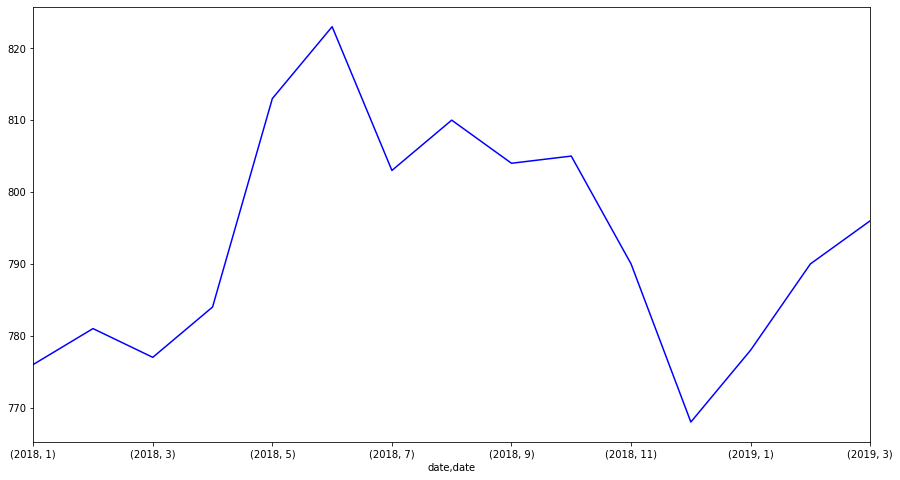

In [127]:
df['date'].groupby([df.date.dt.year, df.date.dt.month]).agg('count').plot(figsize=(15,8), color='blue')
plt.savefig("border_1.pdf")

In [100]:
# df.groupby(by='date').Value.sum().plot(figsize=(15,8), color='blue')


In [128]:
df['date'].groupby([df.date.dt.year, df.date.dt.month]).agg('count')

date  date
2018  1       776
      2       781
      3       777
      4       784
      5       813
      6       823
      7       803
      8       810
      9       804
      10      805
      11      790
      12      768
2019  1       778
      2       790
      3       796
Name: date, dtype: int64